In [23]:
import pandas as pd
import csv
import numpy as np
from scipy import ndimage
from numpy import asarray
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pyabf
from datetime import timedelta
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from neo.io import AxonIO
from matplotlib.gridspec import GridSpec
import urllib
import neo

In [24]:
def addTimeAndFrame(df_func): # this function adds the the column num_of_frames and run_time_ms
    # First it takes care of the time, here takes'image_time' and convert it to a NumPy array
    time_array = df_func["image_time"].to_numpy()
    # Subtract the first value of 'image_time' from all values in 'time_array'
    time_array = time_array-time_array[0]
    # Add a new column named 'run_time_ms' to the DataFrame and assign the modified 'time_array' as its values
    df_func['run_time_ms']=time_array.tolist()
    
    #Now take care of the frame numbers, convert to numpy array and then basically does the same as before, substract first value and save
    frame_array = df_func["frame_id"].to_numpy()
    frame_array = frame_array-frame_array[0]
    # Add 1 to all values in 'frame_array' to adjust for frame numbering
    frame_array = frame_array+1
    df_func['num_of_frames']=frame_array.tolist()
    return df_func

In [25]:
df_RE_230919_515 = pd.read_csv(r'D:\230919_firstRecordingsinFlight\5attempt\rec5\r03c005\pupilTracking_21554817_2023_09_19_16_03_20.csv')
df_LE_230919_515 = pd.read_csv(r'D:\230919_firstRecordingsinFlight\5attempt\rec5\r03c005\pupilTracking_21554827_2023_09_19_16_03_13.csv')

df_RE_230922_321 = pd.read_csv(r'D:\230923_Patch\3rprep\2ndattempt\1strecording\r03c321\pupilTracking_21554817_2023_09_22_16_28_07.csv')
df_LE_230922_321 = pd.read_csv(r'D:\230923_Patch\3rprep\2ndattempt\1strecording\r03c321\pupilTracking_21554827_2023_09_22_16_28_26.csv')

df_RE_231011_311 = pd.read_csv(r'D:\231011_Patch\312\r03c312\pupilTracking_21554817_2023_10_11_16_31_57.csv')
df_LE_231011_311 = pd.read_csv(r'D:\231011_Patch\312\r03c312\pupilTracking_21554827_2023_10_11_16_31_48.csv')

In [27]:
addTimeAndFrame(df_RE_230919_515)
addTimeAndFrame(df_LE_230919_515)

addTimeAndFrame(df_RE_230922_321)
addTimeAndFrame(df_LE_230922_321)

addTimeAndFrame(df_RE_231011_311)
addTimeAndFrame(df_LE_231011_311)


,frame_id,image_time,pupil_x,pupil_y,pupil_size,process_time,image_intensity,run_time_ms,num_of_frames
0,688176,1.697035e+12,638.610071,468.221480,748.0,1.697035e+12,6.308110,0.000000,1
1,688177,1.697035e+12,639.056509,467.613257,699.0,1.697035e+12,6.252996,16.592285,2
2,688178,1.697035e+12,639.382484,468.440572,746.0,1.697035e+12,6.238535,33.183594,3
3,688179,1.697035e+12,638.738981,467.780992,726.0,1.697035e+12,6.383442,49.775391,4
4,688180,1.697035e+12,637.923642,467.559262,794.5,1.697035e+12,6.649033,66.367188,5
...,...,...,...,...,...,...,...,...,...
29814,717990,1.697035e+12,635.723689,463.505202,833.0,1.697035e+12,6.125792,494630.505371,29815
29815,717991,1.697035e+12,635.836833,464.428915,762.0,1.697035e+12,6.176096,494647.094971,29816
29816,717992,1.697035e+12,636.411879,463.796092,861.5,1.697035e+12,5.697249,494663.687500,29817
29817,717993,1.697035e+12,635.818954,463.331017,863.5,1.697035e+12,6.316048,494680.277588,29818


In [29]:
def FrameRateCheck(df_func, name='' , y_lower=15, y_upper=18):
    # Convert to numpy array
    arr = np.array(df_func['image_time'])
    
    # Calculate the differences between consecutive elements in the 'image_time' array
    arr_diff = np.diff(arr)
    
    # Create and display the plot
    plt.scatter(df_func['num_of_frames'][:-1], arr_diff, s=0.3)
    plt.ylim([y_lower, y_upper])
    plt.title(f'{name} - Image Time Differences')
    plt.xlabel('Frame Number')
    plt.ylabel('Time Difference')
    return plt.show()

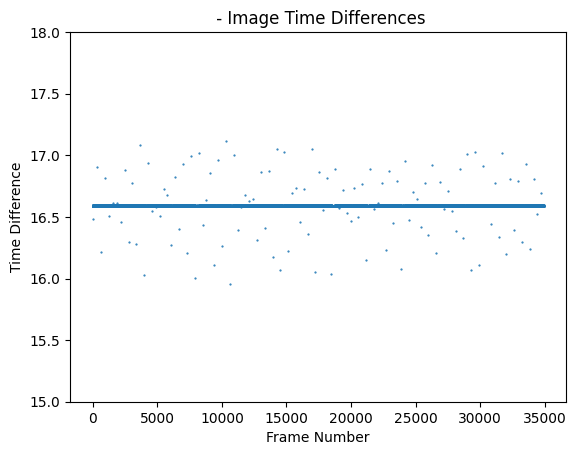

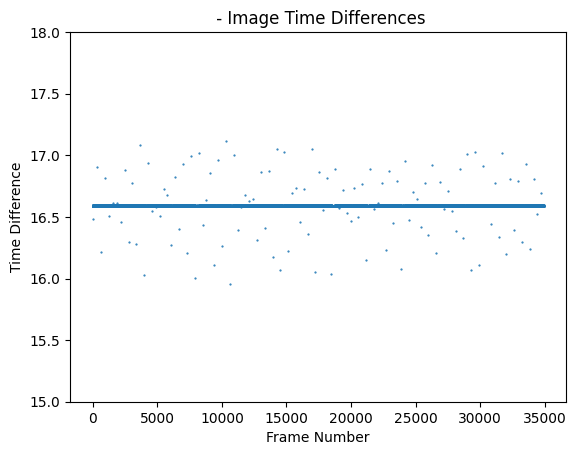

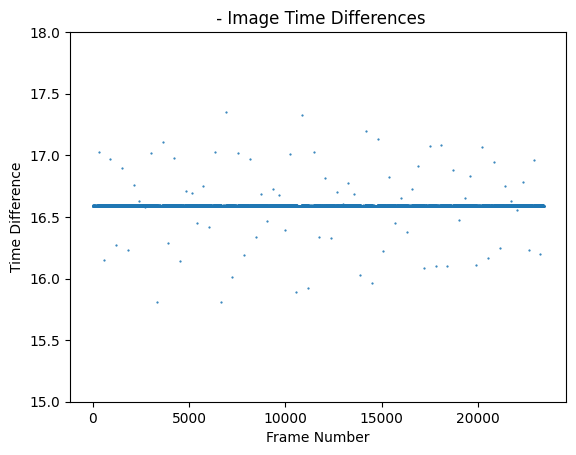

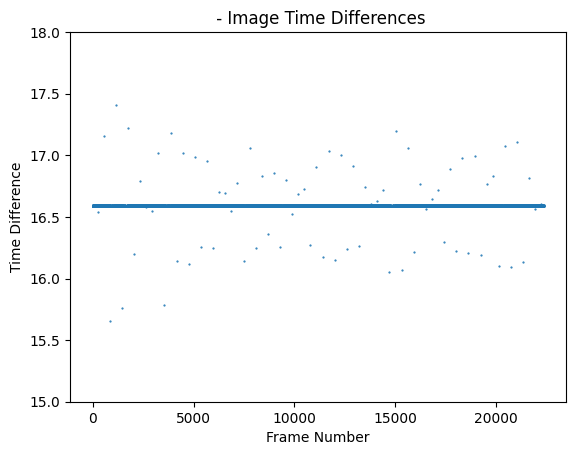

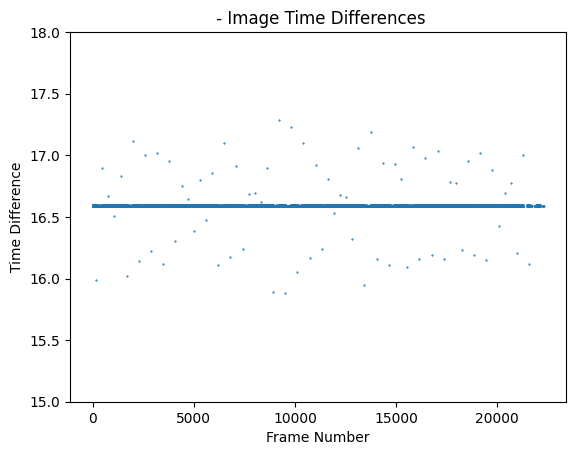

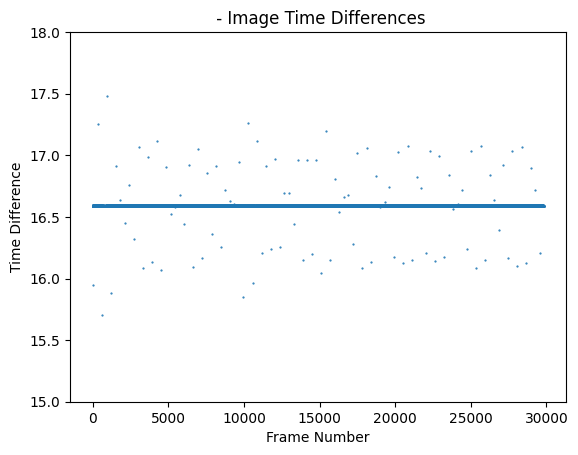

In [32]:
FrameRateCheck(df_RE_230919_515)
FrameRateCheck(df_LE_230919_515)

FrameRateCheck(df_RE_230922_321)
FrameRateCheck(df_LE_230922_321)

FrameRateCheck(df_RE_231011_311)
FrameRateCheck(df_LE_231011_311)


# Rotate

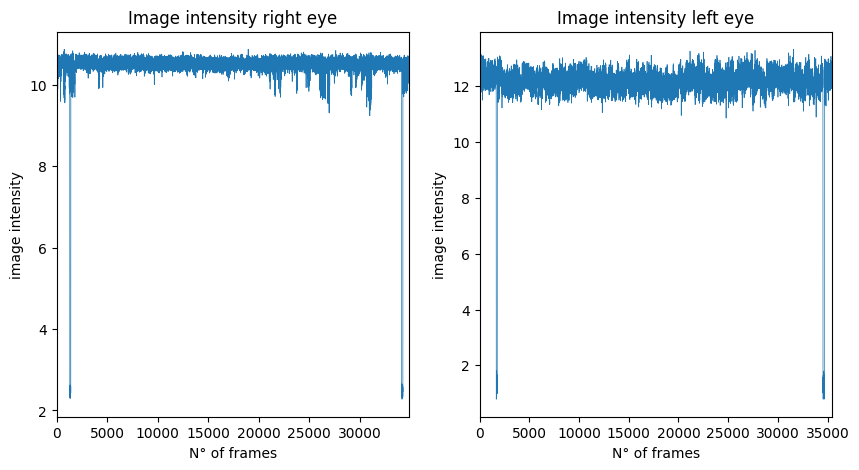

In [33]:
#Display image_intensity
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2, 1)
plt.plot(df_RE_230919_515['num_of_frames'],df_RE_230919_515['image_intensity'],linewidth=0.5)
plt.xlim([0, max(df_RE_230919_515['num_of_frames']) ])

plt.title('Image intensity right eye')
plt.ylabel('image intensity')
plt.xlabel('N° of frames')
#plt.show()

plt.subplot(1,2, 2)
plt.plot(df_LE_230919_515['num_of_frames'],df_LE_230919_515['image_intensity'], linewidth=0.5)
plt.xlim([0, max(df_LE_230919_515['num_of_frames'])])

plt.title('Image intensity left eye')
plt.ylabel('image intensity')
plt.xlabel('N° of frames')
plt.show()

In [40]:
start_1=2000
finish_1= -5000

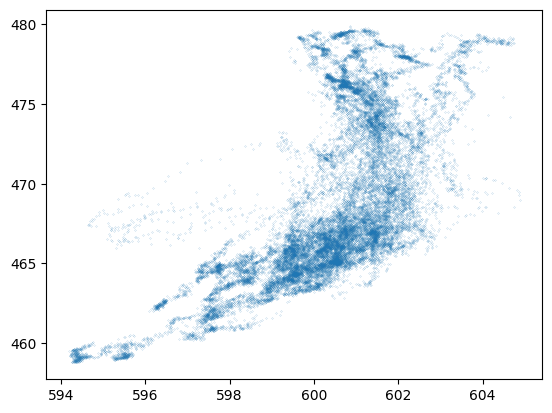

In [41]:
plt.scatter(df_RE_230919_515['pupil_x'][start_1:finish_1],df_RE_230919_515['pupil_y'][start_1:finish_1], s=0.01)

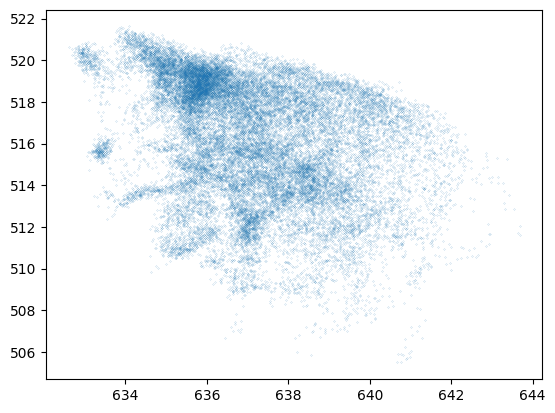

In [42]:
plt.scatter(df_LE_230919_515['pupil_x'][start_1:finish_1],df_LE_230919_515['pupil_y'][start_1:finish_1], s=0.01)

In [47]:
def Transformation(df, start=2000, finish=-5000):
    

    # Defining data for linear Regression and converting them into numpy arrays
    x_LinReg=df[start:finish]['pupil_x'].to_numpy()
    y_LinReg=df[start:finish]['pupil_y'].to_numpy()

    #Resahpe data because 2D array is needed
    x_LinReg=x_LinReg.reshape((-1,1))
    y_LinReg=y_LinReg.reshape((-1,1))

    # Create the model & fit it 
    LinReg = LinearRegression().fit(x_LinReg, y_LinReg)

    # Get results
    r_sq = LinReg.score(x_LinReg, y_LinReg)
    slope=f"{LinReg.coef_}"
    slope=float(slope[+2:-2])
    interception=f"{LinReg.intercept_}"
    interception=float(interception[+1:-1])
    angle=np.degrees(np.arctan(slope))
    print(f"coefficient of determination: {r_sq}")
    print('slope: ', slope)
    print('interception: ', interception)
    print('angle:',angle, 'in degrees')
    

    
    #Plot it
    plt.scatter(df[start:finish]['pupil_x'],df[start:finish]['pupil_y'], s=0.01)
    plt.style.use('default')
    # Add regression
    a=df[start:finish]['pupil_x']
    b= slope*a+interception
    plt.plot(a,b, 'g', linewidth=2)
    #How to mess with axis
    plt.xlabel('x-Position')
    plt.ylabel('y-Position')
    # How to add a titel and other orientations
    plt.title('X and y of right eye')

    plt.show()
    
    #Transformation
    pupil_x_tranfo = (df['pupil_x'] - df['pupil_x'].min()) * np.cos(np.radians(-angle)) - (df['pupil_y'] - df['pupil_y'].min()) * np.sin(np.radians(-angle)) 
    pupil_y_tranfo = (df['pupil_x'] - df['pupil_x'].min()) * np.sin(np.radians(-angle)) + (df['pupil_y'] - df['pupil_y'].min()) * np.cos(np.radians(-angle)) 
    
    df['pupil_x_tranfo'] = pupil_x_tranfo
    df['pupil_y_tranfo'] = pupil_y_tranfo
    
    plt.scatter(df[start:finish]['pupil_x_tranfo'],df[start:finish]['pupil_y_tranfo'], s=0.01)
    
    
    plt.scatter(df['num_of_frames'],df['pupil_x']-(df['pupil_x'][0]), s=0.5, label='raw')
    plt.scatter(df['num_of_frames'],df['pupil_x_tranfo']-(df['pupil_x_tranfo'][0]), s=0.5, label='transformed')
    #plt.xlim([20000,40000])
    #plt.ylim([-10, +15])
    plt.title('Comparision x position raw and transformed RE')
    plt.ylabel('pupil_x')
    plt.xlabel('N° of frames')
    plt.legend()
    plt.show()
    
    plt.scatter(df['num_of_frames'],df['pupil_y']-(df['pupil_y'][0]), s=0.5, label='raw')
    plt.scatter(df['num_of_frames'],df['pupil_y_tranfo']-(df['pupil_y_tranfo'][0]), s=0.5, label='transformed')
    #plt.xlim([20000,40000])
    #plt.ylim([-10, +15])
    plt.title('Comparision x position raw and transformed RE')
    plt.ylabel('pupil_x')
    plt.xlabel('N° of frames')
    plt.legend()
    plt.show()
    
    return df

coefficient of determination: 0.4095945172874421
slope:  1.9382
interception:  -694.961
angle: 62.70886203291122 in degrees


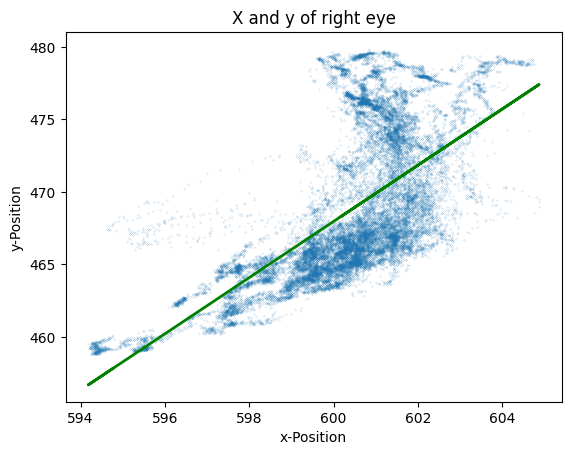

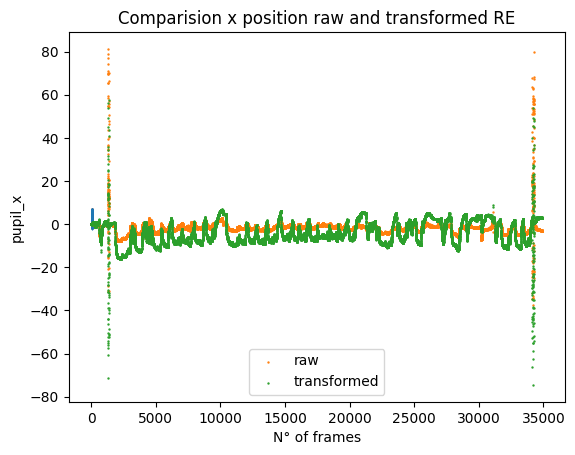

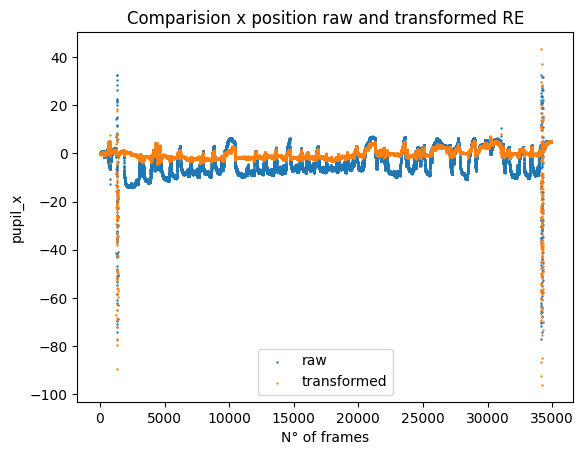

,frame_id,image_time,pupil_x,pupil_y,pupil_size,process_time,image_intensity,run_time_ms,num_of_frames,pupil_x_tranfo,pupil_y_tranfo
0,556113,1.695132e+12,601.975022,472.870800,927.5,1.695132e+12,10.566873,0.000000,1,85.562360,2.076721
1,556114,1.695132e+12,601.981531,472.819258,929.5,1.695132e+12,10.501407,16.589355,2,85.519539,2.047304
2,556115,1.695132e+12,601.986911,472.921463,929.5,1.695132e+12,10.610374,33.179932,3,85.612835,2.089386
3,556116,1.695132e+12,601.951945,472.940290,929.5,1.695132e+12,10.555566,49.770264,4,85.613534,2.129091
4,556117,1.695132e+12,601.937365,472.959683,926.0,1.695132e+12,10.627361,66.362793,5,85.624083,2.150941
...,...,...,...,...,...,...,...,...,...,...,...
34898,591011,1.695133e+12,598.931487,477.781163,902.5,1.695133e+12,10.213859,578976.333008,34899,88.530644,7.032936
34899,591012,1.695133e+12,598.948433,477.824151,898.5,1.695133e+12,10.227245,578992.921875,34900,88.576617,7.037587
34900,591013,1.695133e+12,598.906585,477.839068,901.0,1.695133e+12,10.195602,579009.514160,34901,88.570685,7.081616
34901,591014,1.695133e+12,598.894282,478.079610,906.5,1.695133e+12,10.070798,579026.104736,34902,88.778811,7.202841


In [48]:
Transformation(df_RE_230919_515)

coefficient of determination: 0.12471643892478024
slope:  -0.5575
interception:  871.3603
angle: -29.139666699697415 in degrees


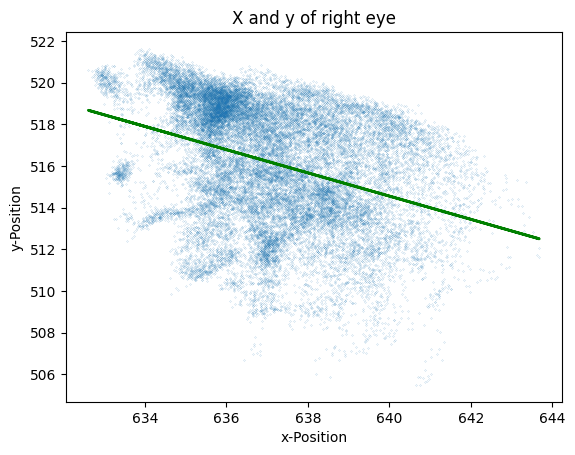

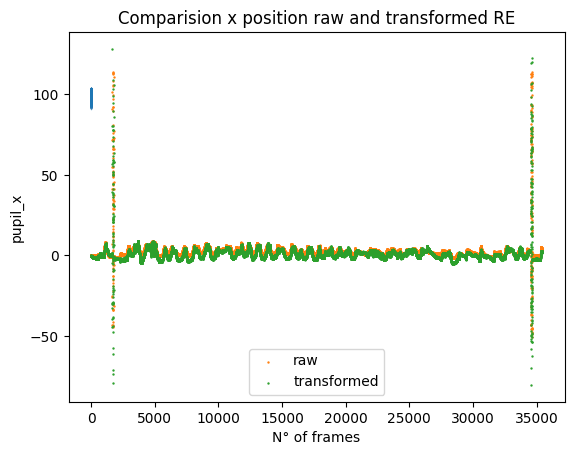

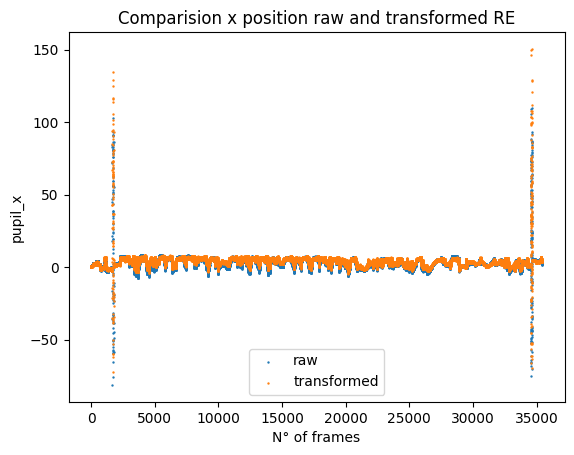

,frame_id,image_time,pupil_x,pupil_y,pupil_size,process_time,image_intensity,run_time_ms,num_of_frames,pupil_x_tranfo,pupil_y_tranfo
0,555938,1.695132e+12,634.455583,512.999165,598.5,1.695132e+12,12.539536,0.000000,1,4.792464,95.733201
1,555939,1.695132e+12,634.403667,513.260263,609.0,1.695132e+12,12.174950,16.588135,2,4.619979,95.935973
2,555940,1.695132e+12,634.616331,513.488535,596.0,1.695132e+12,12.197541,33.179932,3,4.694573,96.238908
3,555941,1.695132e+12,634.510675,513.312553,585.5,1.695132e+12,11.797530,49.770264,4,4.687981,96.033752
4,555942,1.695132e+12,634.211697,513.234761,607.0,1.695132e+12,12.593087,66.357910,5,4.464723,95.820221
...,...,...,...,...,...,...,...,...,...,...,...
35425,591363,1.695133e+12,638.384883,514.602954,575.5,1.695133e+12,12.519062,587721.479736,35426,7.443503,99.047341
35426,591364,1.695133e+12,638.461896,514.679174,573.0,1.695133e+12,12.337282,587738.069336,35427,7.473655,99.151415
35427,591365,1.695133e+12,638.332178,514.901791,577.0,1.695133e+12,12.383468,587754.658691,35428,7.251953,99.282691
35428,591366,1.695133e+12,638.527125,515.231216,574.5,1.695133e+12,12.687168,587771.252197,35429,7.261817,99.665350


In [49]:
Transformation(df_LE_230919_515)

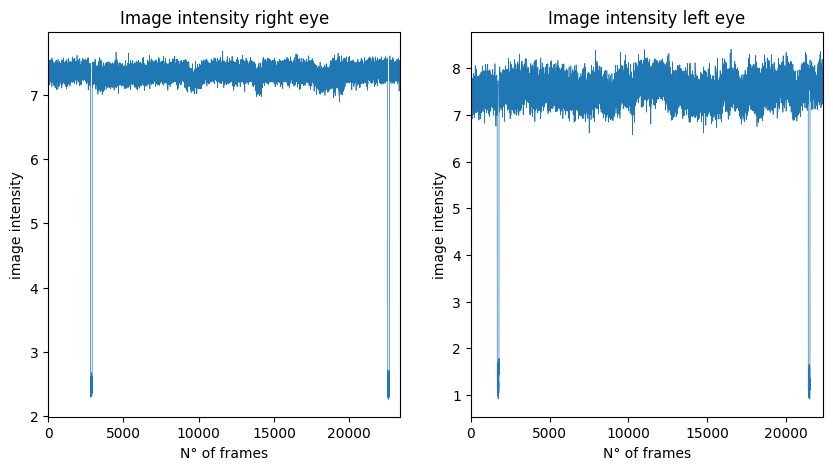

In [57]:
#Display image_intensity
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2, 1)
plt.plot(df_RE_230922_321['num_of_frames'],df_RE_230922_321['image_intensity'],linewidth=0.5)
plt.xlim([0, max(df_RE_230922_321['num_of_frames']) ])

plt.title('Image intensity right eye')
plt.ylabel('image intensity')
plt.xlabel('N° of frames')
#plt.show()

plt.subplot(1,2, 2)
plt.plot(df_LE_230922_321['num_of_frames'],df_LE_230922_321['image_intensity'], linewidth=0.5)
plt.xlim([0, max(df_LE_230922_321['num_of_frames'])])

plt.title('Image intensity left eye')
plt.ylabel('image intensity')
plt.xlabel('N° of frames')
plt.show()

In [66]:
start_2= 3000
finish_2= -1000

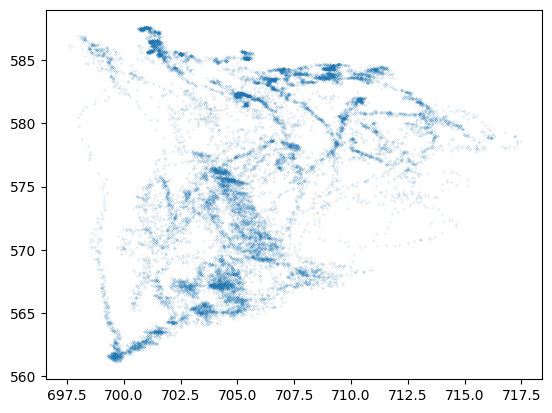

In [67]:
plt.scatter(df_RE_230922_321['pupil_x'][start_2:finish_2],df_RE_230922_321['pupil_y'][start_2:finish_2], s=0.01)

coefficient of determination: 0.09969096354954377
slope:  0.6769
interception:  98.2797
angle: 34.094071219114426 in degrees


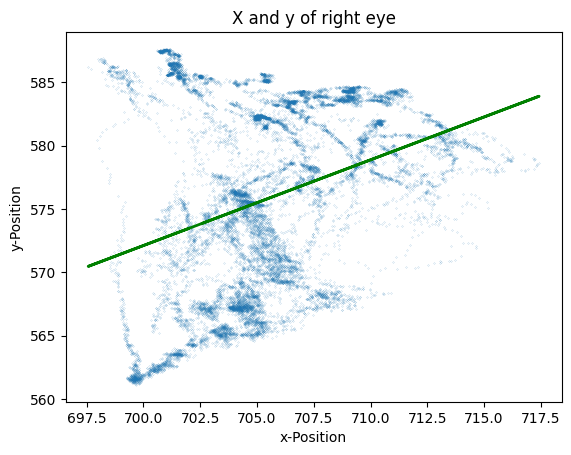

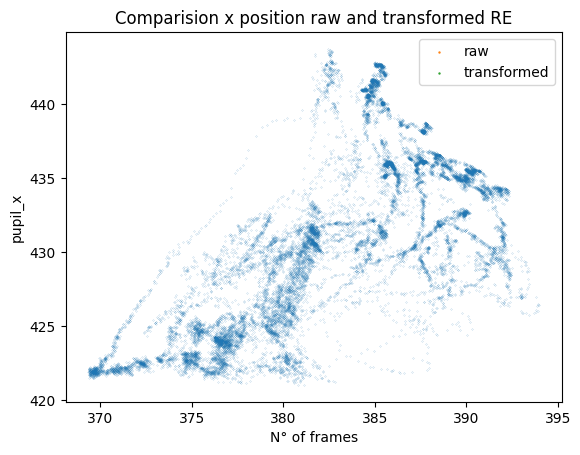

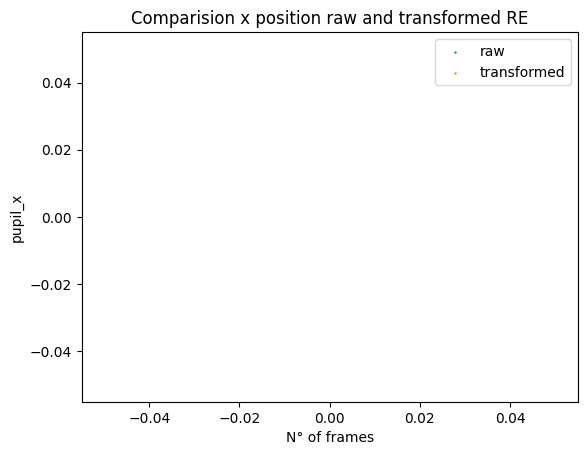

coefficient of determination: 0.005968879293104634
slope:  0.1399
interception:  408.1561
angle: 7.963990880192157 in degrees


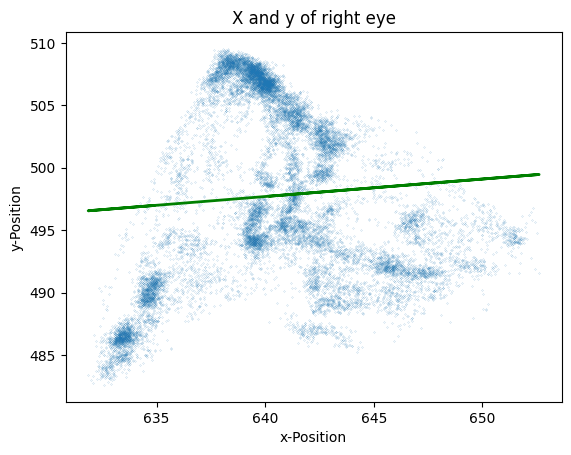

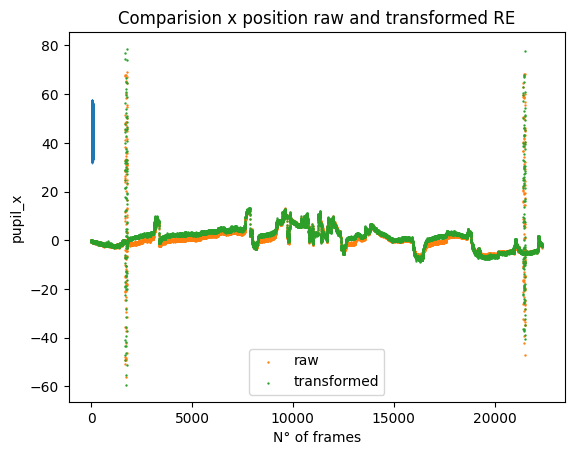

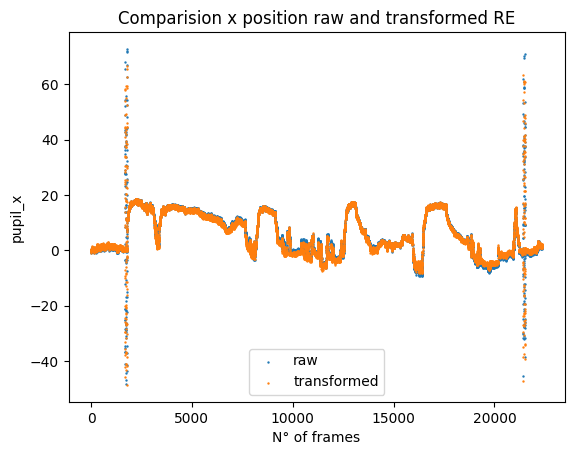

,frame_id,image_time,pupil_x,pupil_y,pupil_size,process_time,image_intensity,run_time_ms,num_of_frames,pupil_x_tranfo,pupil_y_tranfo
0,14526,1.695393e+12,639.561286,491.990696,824.0,1.695393e+12,7.380824,0.000000,1,62.167733,40.065316
1,14527,1.695393e+12,639.477830,491.631890,958.5,1.695393e+12,7.128910,16.588623,2,62.035369,39.721534
2,14528,1.695393e+12,639.409761,492.374455,802.5,1.695393e+12,7.413863,33.177979,3,62.070840,40.466367
3,14529,1.695393e+12,639.074923,491.898865,807.5,1.695393e+12,7.500359,49.770264,4,61.673337,40.041756
4,14530,1.695393e+12,639.575413,491.978482,836.5,1.695393e+12,7.398924,66.363037,5,62.180032,40.051262
...,...,...,...,...,...,...,...,...,...,...,...
22354,36880,1.695393e+12,637.125764,493.399369,845.5,1.695393e+12,7.774908,370866.620117,22355,59.950873,41.797846
22355,36881,1.695393e+12,637.375509,493.378876,940.5,1.695393e+12,7.383591,370883.207764,22356,60.195371,41.742949
22356,36882,1.695393e+12,637.378700,493.274318,867.0,1.695393e+12,7.969611,370899.801758,22357,60.184044,41.638956
22357,36883,1.695393e+12,637.109901,493.683202,826.5,1.695393e+12,7.628752,370916.388672,22358,59.974489,42.081140


In [68]:
Transformation(df_RE_230922_321,start= 3000,finish= -1000  )
Transformation(df_LE_230922_321,start= 3000,finish= -1000  )

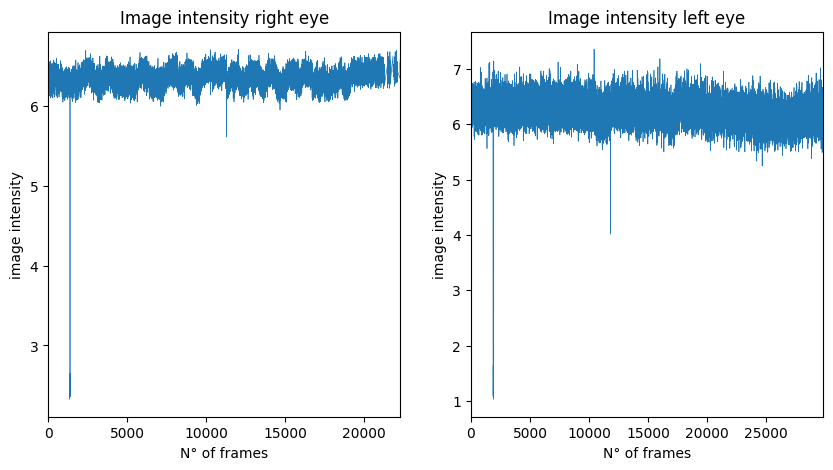

In [69]:
#Display image_intensity
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2, 1)
plt.plot(df_RE_231011_311['num_of_frames'],df_RE_231011_311['image_intensity'],linewidth=0.5)
plt.xlim([0, max(df_RE_231011_311['num_of_frames']) ])

plt.title('Image intensity right eye')
plt.ylabel('image intensity')
plt.xlabel('N° of frames')
#plt.show()

plt.subplot(1,2, 2)
plt.plot(df_LE_231011_311['num_of_frames'],df_LE_231011_311['image_intensity'], linewidth=0.5)
plt.xlim([0, max(df_LE_231011_311['num_of_frames'])])

plt.title('Image intensity left eye')
plt.ylabel('image intensity')
plt.xlabel('N° of frames')
plt.show()

In [79]:
start_3= 3500
finish_3= -1

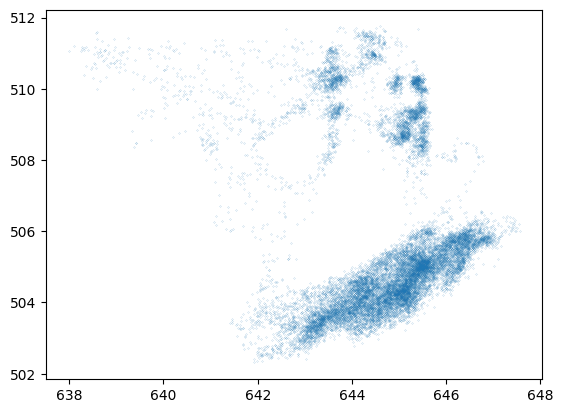

In [80]:
plt.scatter(df_RE_231011_311['pupil_x'][start_3:finish_3],df_RE_231011_311['pupil_y'][start_3:finish_3], s=0.01)

coefficient of determination: 0.0017587038142637956
slope:  -0.0804
interception:  557.5746
angle: -4.5966931020109065 in degrees


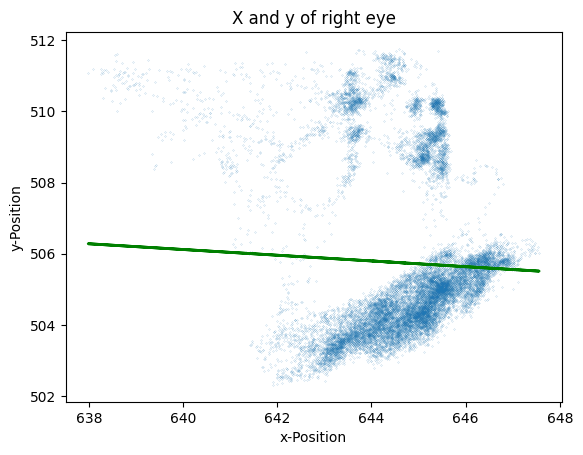

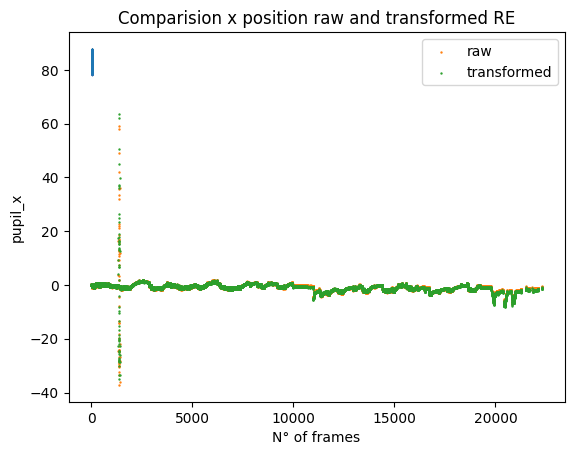

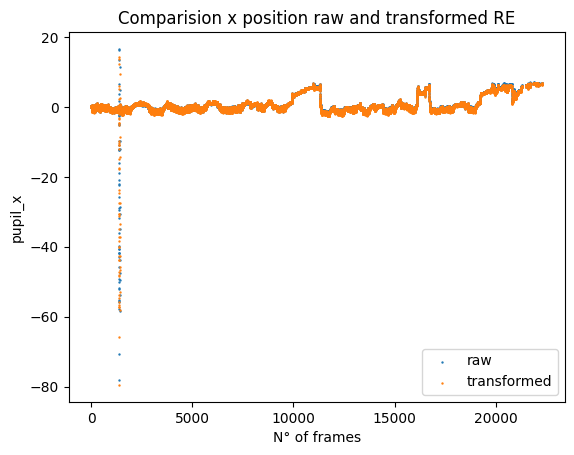

coefficient of determination: 0.11655707007789684
slope:  0.4804
interception:  159.4727
angle: 25.659629633819797 in degrees


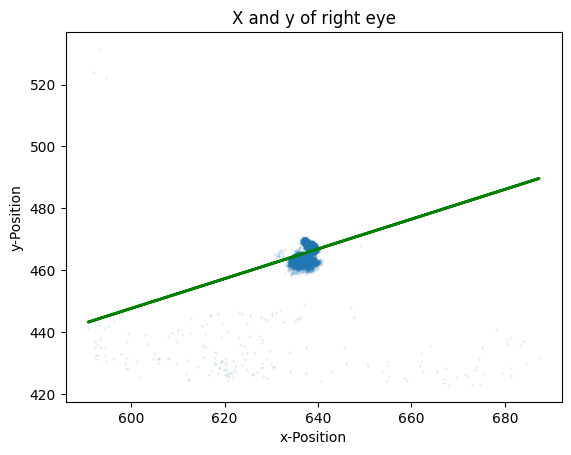

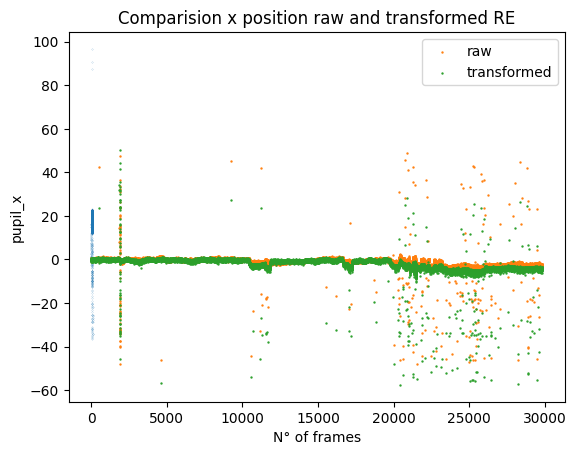

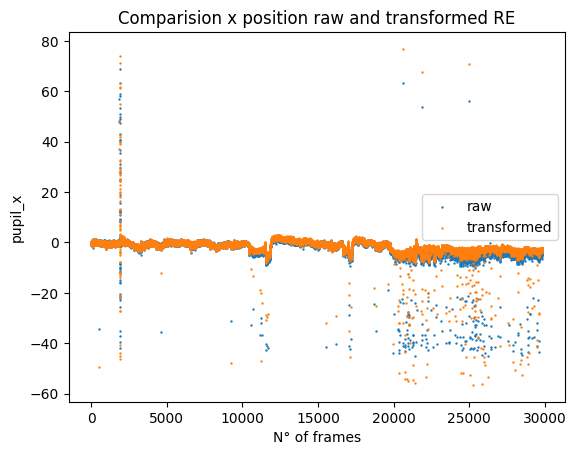

,frame_id,image_time,pupil_x,pupil_y,pupil_size,process_time,image_intensity,run_time_ms,num_of_frames,pupil_x_tranfo,pupil_y_tranfo
0,688176,1.697035e+12,638.610071,468.221480,748.0,1.697035e+12,6.308110,0.000000,1,62.972597,19.916996
1,688177,1.697035e+12,639.056509,467.613257,699.0,1.697035e+12,6.252996,16.592285,2,63.111634,19.175436
2,688178,1.697035e+12,639.382484,468.440572,746.0,1.697035e+12,6.238535,33.183594,3,63.763709,19.780008
3,688179,1.697035e+12,638.738981,467.780992,726.0,1.697035e+12,6.383442,49.775391,4,62.898052,19.464127
4,688180,1.697035e+12,637.923642,467.559262,794.5,1.697035e+12,6.649033,66.367188,5,62.067105,19.617325
...,...,...,...,...,...,...,...,...,...,...,...
29814,717990,1.697035e+12,635.723689,463.505202,833.0,1.697035e+12,6.125792,494630.505371,29815,58.328602,16.915699
29815,717991,1.697035e+12,635.836833,464.428915,762.0,1.697035e+12,6.176096,494647.094971,29816,58.830577,17.699324
29816,717992,1.697035e+12,636.411879,463.796092,861.5,1.697035e+12,5.697249,494663.687500,29817,59.074886,16.879900
29817,717993,1.697035e+12,635.818954,463.331017,863.5,1.697035e+12,6.316048,494680.277588,29818,58.339045,16.717440


In [81]:
Transformation(df_RE_231011_311,start= 3500,finish= -1 )
Transformation(df_LE_231011_311,start= 3500,finish= -1  )


# Removing columns

In [82]:
columns_to_remove = ['pupil_x', 'pupil_y', 'frame_id', 'pupil_size', 'process_time', 'image_time']

df_RE_230919_515 = df_RE_230919_515.drop(columns=columns_to_remove)
df_LE_230919_515 = df_LE_230919_515.drop(columns=columns_to_remove)

df_RE_230922_321 = df_RE_230922_321.drop(columns=columns_to_remove)
df_LE_230922_321 = df_LE_230922_321.drop(columns=columns_to_remove)

df_RE_231011_311 = df_RE_231011_311.drop(columns=columns_to_remove)
df_LE_231011_311 = df_LE_231011_311.drop(columns=columns_to_remove)




In [87]:
df_RE_230919_515.to_csv(r'D:\230919_firstRecordingsinFlight\5attempt\rec5\Analysis\df_RE.csv', index=False)
df_LE_230919_515.to_csv(r'D:\230919_firstRecordingsinFlight\5attempt\rec5\Analysis\df_LE.csv', index=False)


df_RE_230922_321.to_csv(r'D:\230923_Patch\3rprep\2ndattempt\1strecording\Analysis\df_RE.csv', index=False)
df_LE_230922_321.to_csv(r'D:\230923_Patch\3rprep\2ndattempt\1strecording\Analysis\df_LE.csv', index=False)

df_RE_231011_311.to_csv(r'D:\231011_Patch\312\Anlysis\df_RE.csv', index=False)
df_LE_231011_311.to_csv(r'D:\231011_Patch\312\Anlysis\df_LE.csv', index=False)
